In [1]:
import os 
import re
import matplotlib.pyplot as plt



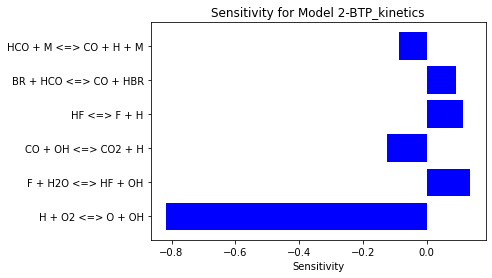

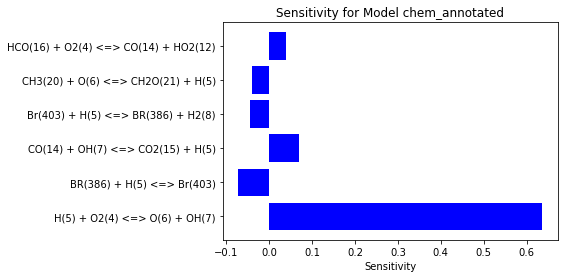

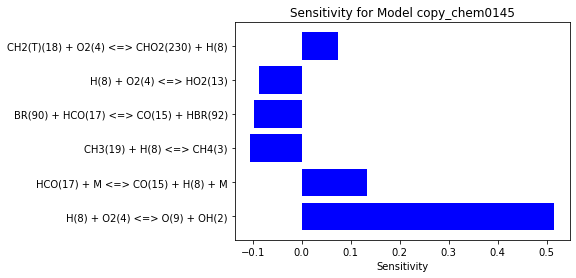

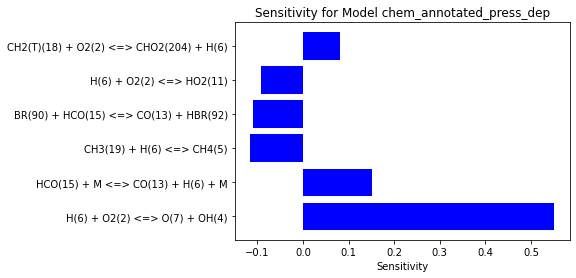

In [3]:
############# load the files ################

directory = 'csvs'

#list_of_csvs = [file for file in os.listdir(directory) if re.search('[\S]+\.csv', file)]

list_of_csvs = ['sensitivites_2-BTP_kinetics.cti.csv', 'sensitivites_chem_annotated.cti.csv', 'sensitivites_copy_chem0145.cti.csv', 'sensitivites_chem_annotated_press_dep.cti.csv']

############ extract dictionary from each and place into new dictionary #############
master_dict = dict()

for file in list_of_csvs: 
    fig, ax = plt.subplots()

    
    new_triplet = []
    match = re.search('sensitivites_([\S]+)\.cti.csv', file)
    assert match.group(1)
    plt.xlabel('Sensitivity')
    plt.title(f"Sensitivity for Model {match.group(1)}")
    with open(f'./csvs/{file}', 'r') as f: 
        txt = f.readlines()
        list_of_triplets = txt[-1].split('","')
        rewritten_list_of_triplets = []
        for triplet in list_of_triplets[0:6]: 
            individual_values = triplet.split(', ')
            first = individual_values[0].replace('"[', '').replace('[','')
            middle = individual_values[1]
            last = individual_values[-1].replace("\']", '').replace("'", '')
            final_triplet = [float(first), float(middle), last]

############# plot the data on separate figures #######################
        
            ax.barh(final_triplet[2], final_triplet[1], color='b', align='center')

    

Actually looking in cti files: 

- NIST kinetics 

# Reaction 844
reaction('H2O + F <=> OH + HF', [1.300000e+09, 1.5, 0.0])
# <A HREF=#96BUR/ZAC>96BUR/ZAC</A> <A HREF=#83WAL/WAG>83WAL/WAG</A> (FIT)


- RMG kinetics 
! Template reaction: H_Abstraction

# Reaction 869
reaction('F(37) + H2O(5) <=> HF(38) + OH(2)', [1.365080e+08, 1.747, -0.538])


- David kinetics (F(404) = HF F(388) = F)
# Reaction 954
reaction('F(388) + H2O(9) <=> F(404) + OH(7)', [1.300000e+09, 1.5, 0.0])
#  Reaction index: Chemkin #955; RMG #5122
#  Template reaction: H_Abstraction
#  Matched reaction 4008 HO2_r12 + F <=> O2 + HF in H_Abstraction/training
#  This reaction matched rate rule [Orad_O_H;F_rad]
#  family: H_Abstraction 

########################################################################################

- NIST kinetics 

# Reaction 840
reaction('HF <=> H + F', [3.120000e+13, 0.0, 99320.0])
# <A HREF=#81BAU/DUX>81BAU/DUX</A> (EXPT)
# ********************************
# *** HF, F, F2: Atom transfer ***
# ********************************


- RMG kinetics 
! Library reaction: halogens_pdep
# Reaction 840
three_body_reaction('F(37) + H(8) + M <=> HF(38) + M', [1.700000e+21, -2.0, 0.0],
                    efficiencies='C2H6(31):3.0 CF2O(49):5.0 CH2F2(41):6.0 CH4(3):2.0 CHF3(42):6.0 CO(15):1.5 CO2(16):2.0 H2(10):2.0 H2O(5):9.0 HF(38):2.0')
                    

- David kinetics 
# Reaction 951
reaction('F(388) + H(5) <=> F(404)', [7.252390e+12, 0.212, 0.0])
#  Reaction index: Chemkin #952; RMG #5108
#  Template reaction: H_Abstraction
#  Matched reaction 4007 F + HO <=> O_rad_p + HF in H_Abstraction/training
#  This reaction matched rate rule [OH_rad_H;F_rad]
#  family: H_Abstraction
                    
                    


                    